<a href="https://colab.research.google.com/github/raviyadav44/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
titanic=pd.read_csv("/content/drive/MyDrive/titanic/titanic.csv")

In [3]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


CLEANING

In [4]:
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [5]:
titanic['age'].fillna(titanic['age'].mean(),inplace=True)

In [6]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Combine Sibsp and Parch

<Figure size 432x288 with 0 Axes>

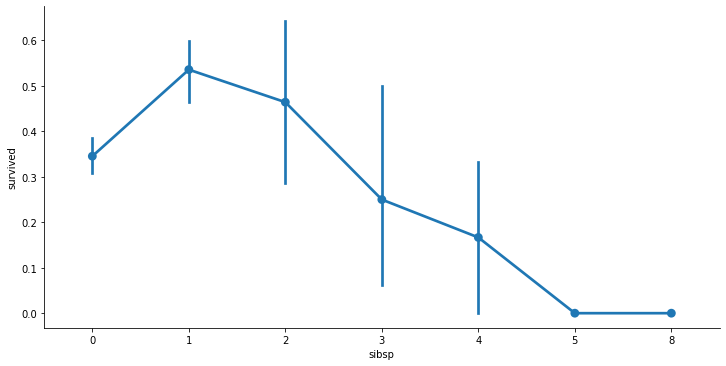

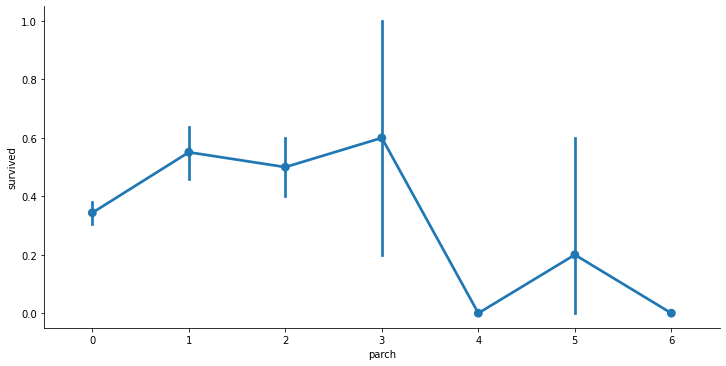

In [7]:
for i,col in enumerate(['sibsp','parch']):
  plt.figure(i)
  sns.catplot(x=col,y='survived',data=titanic,kind='point',aspect=2,)

since they are showing similar trajectory so we can combine them.

In [8]:
titanic['family_cnt']=titanic['sibsp']+titanic['parch']

In [9]:
#droping the features of sibsp and parch
titanic.drop(['sibsp','parch'],axis=1,inplace=True)

In [10]:
titanic.head()

,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [11]:
titanic.isnull().sum()

survived        0
pclass          0
name            0
sex             0
age             0
ticket          0
fare            0
cabin         687
embarked        2
family_cnt      0
dtype: int64

In [12]:
titanic.groupby(titanic['cabin'].isnull())['survived'].mean()

cabin
False    0.666667
True     0.299854
Name: survived, dtype: float64

the above code gives the average of survived people when they have a cabin or not.

In [13]:
titanic['cabin_ind']=np.where(titanic['cabin'].isnull(),0,1)

In [14]:
titanic.head()

,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_cnt,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [15]:
#Convert sex to numeric
gender_num={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(gender_num)

In [16]:
titanic.head()

,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_cnt,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [17]:
#Drop unnecessary variables
titanic.drop(['cabin','embarked','name','ticket'],axis=1,inplace=True)

In [18]:
titanic.head()

,survived,pclass,sex,age,fare,family_cnt,cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [19]:
titanic.to_csv("/content/drive/MyDrive/titanic/titanic_cleaned.csv",index=False)

Spiliting the data into train , validation and test set

In [20]:
titanic_=pd.read_csv("/content/drive/MyDrive/titanic/titanic_cleaned.csv")

In [21]:
titanic_.head()

,survived,pclass,sex,age,fare,family_cnt,cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [22]:
features=titanic_.drop('survived',axis=1)
labels=titanic_['survived']


In [25]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.4,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [26]:
for dataset in ([y_train,y_val,y_test]):
  print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [27]:
X_train.to_csv("/content/drive/MyDrive/titanic/train_features.csv",index=False)
X_val.to_csv("/content/drive/MyDrive/titanic/val_features.csv",index=False)
X_test.to_csv("/content/drive/MyDrive/titanic/test_features.csv",index=False)

y_train.to_csv("/content/drive/MyDrive/titanic/train_labels.csv",index=False)
y_val.to_csv("/content/drive/MyDrive/titanic/val_labels.csv",index=False)
y_test.to_csv("/content/drive/MyDrive/titanic/test_labels.csv",index=False)

#Model testing with regression 

In [28]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
dir(LogisticRegression())

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'class_weight',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [41]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

tr_features=pd.read_csv("/content/drive/MyDrive/titanic/train_features.csv")
tr_labels=pd.read_csv("/content/drive/MyDrive/titanic/train_labels.csv")

In [42]:
tr_labels.head()

,survived
0,1
1,0
2,1
3,0
4,1


In [47]:
def print_results(results):
  print('BEST PARAMS: {}\n'.format(results.best_params_))

  means=results.cv_results_['mean_test_score']
  stds=results.cv_results_['std_test_score']
  for mean,std,params in zip(means,stds,results.cv_results_['params']):
    print('{}  (+/-{}) for {}'.format(round(mean,3),round(std * 2,3),params))

In [46]:
lr=LogisticRegression()
parameters={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}
cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS: {'C': 1}

0.67  (+/-0.077) for {'C': 0.001}
0.708  (+/-0.098) for {'C': 0.01}
0.777  (+/-0.134) for {'C': 0.1}
0.8  (+/-0.118) for {'C': 1}
0.794  (+/-0.116) for {'C': 10}
0.794  (+/-0.116) for {'C': 100}
0.794  (+/-0.116) for {'C': 1000}


In [48]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
joblib.dump(cv.best_estimator_,"/content/drive/MyDrive/titanic/LR_model.pkl")

['/content/drive/MyDrive/titanic/LR_model.pkl']

#SVM

In [50]:
from sklearn.svm import SVC
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
dir(SVC())

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'coef_',
 

In [52]:
 import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

tr_features=pd.read_csv("/content/drive/MyDrive/titanic/train_features.csv")
tr_labels=pd.read_csv("/content/drive/MyDrive/titanic/train_labels.csv")

In [57]:
svc=SVC()
parameters={
    'kernel':['linear','rbf'],
    'C': [0.1,1,10]
}
cv=GridSearchCV(svc,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796  (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654  (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796  (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661  (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796  (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684  (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [58]:
cv.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
joblib.dump(cv.best_estimator_,"/content/drive/MyDrive/titanic/SVC_model.pkl")

['/content/drive/MyDrive/titanic/SVC_model.pkl']